In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [131]:
# 데이터 불러오기
df = pd.read_csv('./Data/08_소년범죄 중 5대 강력범죄 비율.csv', sep = ',', thousands=',') 
df.fillna(0, inplace=True)
df.head()

,No,자료시점,분류,분류.1,분류.2,소년(소계),14세미만,14세,15세,16세,17세,18세
0,1,2019년,계,계[입력치],계[입력치],66247.0,0.0,9053.0,11730.0,13548.0,14338.0,17578.0
1,2,2019년,형법범,형법범계[입력치],형법범계[입력치],54497.0,0.0,8322.0,10399.0,11105.0,11090.0,13581.0
2,3,2019년,형법범,재산범죄,재산범죄의 계[입력치],27809.0,0.0,5077.0,5802.0,6202.0,5274.0,5454.0
3,4,2019년,형법범,재산범죄,배임,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2019년,형법범,재산범죄,사기,8088.0,0.0,609.0,1023.0,1762.0,2044.0,2650.0


In [135]:
df_all = pd.DataFrame(data= { '분류': df['분류.2'], '범죄자수': df['소년(소계)'] })
df_all = df_all[(~df_all['분류'].str.contains('계'))]
df_all.head()

,분류,범죄자수
3,배임,1.0
4,사기,8088.0
5,손괴,1124.0
6,장물,175.0
7,절도,17141.0


In [160]:
# 5대범죄 추출
df_5 = pd.concat([
    df_all[df_all['분류'] == '절도'],
    df_all[df_all['분류'] == '강도'],
    df_all[df_all['분류'] == '살인'],
    df_all[df_all['분류'] == '성폭력'],
])

force = [
    '공갈',
    '상해',
    '약취와 유인',
    '체포와 감금',
    '폭력행위등\(단체등의구성,활동\)',
    '폭력행위등\(손괴,강요,주거침입등\)',
    '폭행',
    '협박',
]


force_count = 0
for f in force:
    df_temp = df_all[df_all['분류'] == f]
    if not df_temp.empty:
        force_count += df_temp.iloc[0]['범죄자수']

df_5 = df_5.append({ '분류': '폭력', '범죄자수': force_count }, ignore_index=True)
df_5

,분류,범죄자수
0,절도,17141.0
1,강도,366.0
2,살인,20.0
3,성폭력,3180.0
4,폭력,18011.0


In [173]:
all_count = df_all['범죄자수'].sum()

df_result = df_5.append({ '분류': '기타', '범죄자수': all_count - df_5['범죄자수'].sum() }, ignore_index=True)
df_result

,분류,범죄자수
0,절도,17141.0
1,강도,366.0
2,살인,20.0
3,성폭력,3180.0
4,폭력,18011.0
5,기타,27529.0


In [170]:
# 그래프 그리기

fm = mp.font_manager.FontManager()
#한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')

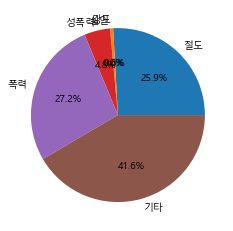

In [182]:
ratio = []
labels = []

for i in range(len(df_result)):
    labels.append(df_result.iloc[i]['분류'])
    ratio.append(df_result.iloc[i]['범죄자수'] / all_count * 100)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [22]:
# 데이터 불러오기
df = pd.read_csv('./Data/08_소년범죄 중 5대 강력범죄 비율_2.csv', encoding='cp949') 
df.fillna(0, inplace=True)
df[['죄종별(2)','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8','2019.9']]
# df.head()

,죄종별(2),2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9
0,죄종별(2),미성년,미성년,미성년,미성년,미성년,성년,성년,성년
1,죄종별(2),14세,15세,16세,17세,18세,소계,19세,20세
2,소계,9028,11681,13503,14249,17446,1516477,20259,18026
3,소계,305,431,463,525,634,26550,693,509
4,살인기수,-,-,3,1,5,335,6,-
5,살인미수등,2,1,1,3,3,515,6,2
6,강도,38,69,84,77,93,974,82,51
7,강간·강제추행,-,-,-,-,-,-,-,-
8,강간,51,115,122,167,183,5489,226,167
9,유사강간,14,25,24,36,41,754,30,35


In [4]:
# 전체
df_all = df[df['죄종별(1)'] == '계']
df_all

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
2,계,소계,1815233,86616,316,5454,17834,22791,20774,19447,...,131970,123442,156540,155689,192774,184847,180686,116263,58659,58521


In [5]:
# 살인
df_murder = df[df['죄종별(2)'].str.contains('살인')]
df_murder

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
4,강력범죄,살인기수,449,7,-,-,-,2,2,3,...,26,32,36,30,34,37,44,29,17,22
5,강력범죄,살인미수등,836,5,-,-,1,-,1,3,...,37,41,46,50,73,72,73,45,28,18


In [6]:
# 강도
df_gang = df[df['죄종별(2)'].str.contains('강도')]
df_gang

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
6,강력범죄,강도,4890,1144,-,36,185,284,328,311,...,128,111,101,75,95,72,60,32,8,11


In [7]:
# 성범죄
df_gender = df[(df['죄종별(2)'].str.contains('강간')) | df['죄종별(2)'].str.contains('강제추행')]
df_gender

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
7,강력범죄,강간·강제추행,17652,1883,5,80,280,507,502,509,...,-,-,-,-,-,-,-,-,-,-
8,강력범죄,강간,-,-,-,-,-,-,-,-,...,888,617,619,438,416,361,337,200,100,98
9,강력범죄,유사강간,-,-,-,-,-,-,-,-,...,103,96,54,75,62,50,44,31,12,18
10,강력범죄,강제추행,-,-,-,-,-,-,-,-,...,1866,1529,1724,1559,1922,1841,1625,1008,655,807
11,강력범죄,기타 강간·강제추행등,-,-,-,-,-,-,-,-,...,40,32,48,27,32,28,27,19,9,10


In [8]:
# 절도
df_steal = df[df['죄종별(1)'] == '절도범죄']
df_steal

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
12,절도범죄,소계,111390,32693,63,2796,8700,9644,6671,4819,...,6625,5797,6980,6514,7995,8188,9554,7410,5216,8744


In [9]:
# 폭력
df_force = df[(df['죄종별(1)'] == '폭력범죄') & (df['죄종별(2)'] != '소계')]
df_force

,죄종별(1),죄종별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20
14,폭력범죄,상해,89138,2695,9,160,457,562,657,850,...,3573,3723,4933,4919,6120,5686,5207,3259,1634,1847
15,폭력범죄,폭행,161782,3591,9,136,427,639,987,1393,...,16270,15857,21487,21022,25246,23182,21778,13115,6242,6201
16,폭력범죄,체포·감금,969,21,1,2,3,3,8,4,...,152,133,151,138,174,165,161,86,43,31
17,폭력범죄,협박,3855,70,3,3,15,11,21,17,...,1403,1592,2325,2518,3230,3147,2832,1652,764,688
18,폭력범죄,약취·유인,340,16,-,-,2,1,4,9,...,30,42,55,41,24,16,27,8,12,22
19,폭력범죄,폭력행위등,103423,15386,29,1210,3880,4106,3232,2929,...,2533,2004,2142,1733,1985,1675,1485,867,422,352
20,폭력범죄,공갈,3786,1576,-,136,466,491,312,171,...,197,223,240,262,295,302,235,130,64,47
21,폭력범죄,손괴,28749,452,12,34,56,79,117,154,...,2774,2867,3914,3972,5046,4909,4427,2649,1353,1854


In [64]:
def make_dict_from_df_sum(dataframe):
    # 조회기간 : 2011 ~ 2019
    start_year = 2011
    end_year = 2019

    # 세분류 컬럼 갯수
    columns_young = 6 + 1
    columns_old = 13 + 1 + 1

    column_start = 3

    d = {}
    for i in range(len(dataframe)):
        column_index = column_start
        data = dataframe.iloc[i].str.replace('-', '0')

        for y in range(start_year, end_year + 1):

            year = str(y)
            key_young = year + '_young'
            key_old = year + '_old'

            if(d.get(key_young) == None):
                d[key_young] = 0
                
            d[key_young] += int(data[column_index])

            column_index += columns_young

            if(d.get(key_old) == None):
                d[key_old] = 0

            d[key_old] += int(data[column_index])

            column_index += columns_old

    return d

In [75]:
def make_df_with_sum(dataframe):
    # 조회기간 : 2011 ~ 2019
    start_year = 2011
    end_year = 2019

    # 세분류 컬럼 갯수
    columns_young = 6 + 1
    columns_old = 13 + 1 + 1

    column_start = 3

    
    df_o = pd.DataFrame(columns=range(start_year, end_year + 1))
    
    dict_y = {y : 0 for y in range(start_year, end_year + 1)}
    dict_o = {y : 0 for y in range(start_year, end_year + 1)}


    for i in range(len(dataframe)):
        column_index = column_start
        data = dataframe.iloc[i].str.replace('-', '0')

        for y in range(start_year, end_year + 1):
            if y == 2019:
                column_index -= 1

            # print('young', column_index)
                
            dict_y[y] += int(data[column_index])
            column_index += columns_young

            if y == 2018:
                column_index -= 1


            print(column_index)

            dict_o[y] += int(data[column_index])
            column_index += columns_old

    df_y = pd.DataFrame.from_dict(dict_y, orient='index')
    df_y.columns = ['범죄자수']

    df_o = pd.DataFrame.from_dict(dict_o, orient='index')
    df_o.columns = ['범죄자수']

    return df_y, df_o

In [72]:
# 연간 소년/성인 전체 집계 추출
df_all_y, df_all_o = make_df_with_sum(df_all)

# 연간 소년/성인 살인 집계 추출
df_murder_y, df_murder_o = make_df_with_sum(df_murder)

# 연간 소년/성인 살인 집계 추출
df_gang_y, df_gang_o = make_df_with_sum(df_gang)

# 연간 소년/성인 살인 집계 추출
df_gender_y, df_gender_o = make_df_with_sum(df_gender)

# 연간 소년/성인 살인 집계 추출
df_steal_y, df_steal_o = make_df_with_sum(df_steal)

# 연간 소년/성인 살인 집계 추출
df_force_y, df_force_o = make_df_with_sum(df_force)

In [76]:
df_murder_y, df_murder_o = make_df_with_sum(df_murder)
df_murder_y, df_murder_o


10
32
54
76
98
120
142
163
185
10
32
54
76
98
120
142
163
185


(      범죄자수
 2011    12
 2012    23
 2013    21
 2014    33
 2015    18
 2016    19
 2017    17
 2018     9
 2019    19,
       범죄자수
 2011  1273
 2012  1032
 2013   974
 2014   988
 2015   956
 2016   976
 2017   888
 2018   857
 2019    12)

In [58]:
# 5대범죄 합계 추출
df_5_y = df_murder_y + df_gang_y + df_gender_y + df_steal_y + df_force_y
df_5_o = df_murder_o + df_gang_o + df_gender_o + df_steal_o + df_force_o

In [59]:
# 5. 전체 소년범죄 중 5대 강력 범죄 비율
df_5_y / df_all_y * 100

,범죄자수
2011,68.739032
2012,69.571040
2013,65.499328
2014,62.699275
2015,60.788737
2016,59.628813
2017,60.907145
2018,60.269974
2019,59.186429


In [60]:
# 5. 전체 성인범죄 중 5대 강력 범죄 비율
df_5_o / df_all_o * 100

,범죄자수
2011,27.057544
2012,28.064698
2013,26.537534
2014,26.249081
2015,26.718502
2016,26.424752
2017,28.073996
2018,48.782514
2019,28.740429


In [61]:
df_5_o , df_all_o

(        범죄자수
 2011  467714
 2012  454290
 2013  438235
 2014  428674
 2015  451532
 2016  467424
 2017  452381
 2018    9396
 2019  435842,
          범죄자수
 2011  1728590
 2012  1618724
 2013  1651378
 2014  1633101
 2015  1689960
 2016  1768887
 2017  1611388
 2018    19261
 2019  1516477)